<a href="https://colab.research.google.com/github/MaricelaMH/SIMULACION-II/blob/main/JUEGO(SYE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# J U E G O  :  S E R P I E N T E S  -  Y  -  E S C A L E R A S

![texto alternativo](https://drive.google.com/uc?id=1Gei5oiR5wOsTJfPtuFlm-KXZVPBnqY64)

¿Cuál es, en promedio, el número de tiradas necesarias para terminar el juego? Considerar que cada tirada se hace con un dado ordinario.


Responder:

a) Analíticamente.

b) Por simulación.


S O L U C I Ó N --- A N A L Í T I C A

Nuestra matriz de trancisión es la siguiente:
![texto alternativo](https://drive.google.com/uc?id=1afYcI9hJi5HcnWwhIwP4-7-ML5hjv_ar)


DATOS:

1. Contamos con un total de 20 casillas.
2. Serpientes:
   * La casilla 13 te lleva a la casilla 4.
   * La casilla 17 te lleva a la casilla 10.
3. Escaleras:
   * La casilla 3 te lleva a la casilla 11.
   * La casilla 15 te lleva a la casilla 19.

Queremos calcular el número esperado de tiradas necesarias para llegar desde la casilla 1 a la casilla 20.

Veamos que el juego de serpientes y escaleras se puede modelar mediante una cadena de Markov con estados absorbentes. La casilla final (casilla 20) es un estado absorbente, ya que una vez que se llega a ella, no se sale de ese estado. Por lo tanto, el problema de calcular el número esperado de lanzamientos para llegar a la casilla 20 puede determinarse con el tiempo de absorción en una cadena de Markov con un estado absorbente.

En una cadena de Markov con estados absorbentes, la matriz de transición
$P$ describe las probabilidades de moverse entre estados, incluyendo el estado absorbente. La casilla final (20) es absorbente, lo que significa que una vez que llegas a ella, permaneces allí con probabilidad 1.

La matriz de transición
$P$ puede escribirse en bloques, separando los estados absorbentes de los estados transitorios:

$$ P=  [ \begin{matrix}
Q & R\\
0 & I
\end{matrix} ] $$

Donde:

* $Q$ es la submatriz de transiciones entre estados transitorios (casillas 1 a 19).

* $R$ es la submatriz de transiciones entre los estados transitorios y el estado absorbente (casilla 20).

* $I$ es la identidad, indicando que el estado absorbente se mantiene fijo.

* $0$ es un vector de ceros, ya que no hay transiciones de la casilla 20 hacia otros estados.

Asi para calcular el tiempo esperado de absorción, se utiliza la matriz fundamental $N$ , que esta dada por:

$$N=(I-Q)^-1$$

Esta matriz $N$ nos da la esperanza del número de pasos que el sistema pasará en cada estado transitorio antes de ser absorbido, comenzando desde cualquier estado transitorio.

Finalmente para calcular el tiempo esperado de absorción desde cualquier estado inicial $i$ es simplemente la suma de las filas correspondientes de la matriz $N$. Es decir, el tiempo esperado para ser absorbido, comenzando desde el estado $i$, es:

$$ t_i = \sum_j N[i,j]$$
​
Por lo que , el valor de $t_1$ será el número esperado de tiradas  necesarias para llegar desde la casilla 1 hasta la casilla 20.

Se realiza el siguiente programa:




In [47]:
# Ingresamos nuestras librerias
import numpy as np
import pandas as pd

In [48]:
# Numero de casillas totales del tablero
N=20

# Creamos nuestra matriz de transición de 20x20 con las probabilidades del juego
P = np.array([
    [0, 1/6, 0, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 0, 1/6, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 0, 1/6, 1/6, 1/6, 0, 1/6, 0, 0, 0, 0, 1/6, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 1/6, 1/6, 0, 1/6, 0, 1/6, 0, 0, 1/6, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 0, 1/6, 0, 1/6, 0, 1/6, 0, 1/6, 0, 0, 1/6, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 0, 1/6, 0, 0, 0, 1/6, 0, 1/6, 0, 1/6, 1/6, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1/6, 0, 0, 0, 0, 0, 1/6, 0, 1/6, 1/3, 1/6],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 0, 1/6, 1/6, 1/2],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/6, 5/6],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
])


In [49]:
# Creamos una tabla
df = pd.DataFrame(P, index=[f'Casilla {i+1}' for i in range(N)], columns=[f'Casilla {i+1}' for i in range(N)])

# Creamos la submatriz de estados transitorios (19x19)
Q = P[:-1, :-1]

# Creamos la matriz identidad
I = np.eye(N - 1)

# Calculamos la matriz fundamental N = (I - Q)^-1
N_matrix = np.linalg.inv(I - Q)

# Calculamos el tiempo esperado de absorción desde la casilla 1 (fila 1 de N)
t_1 = np.sum(N_matrix[0, :])

# Imprimimos la matriz de transición y el tiempo esperado
print("Matriz de transición (P):")
print(df)



Matriz de transición (P):
            Casilla 1  Casilla 2  Casilla 3  Casilla 4  Casilla 5  Casilla 6  \
Casilla 1         0.0   0.166667        0.0   0.166667   0.166667   0.166667   
Casilla 2         0.0   0.000000        0.0   0.166667   0.166667   0.166667   
Casilla 3         0.0   0.000000        0.0   0.000000   0.000000   0.000000   
Casilla 4         0.0   0.000000        0.0   0.000000   0.166667   0.166667   
Casilla 5         0.0   0.000000        0.0   0.000000   0.000000   0.166667   
Casilla 6         0.0   0.000000        0.0   0.000000   0.000000   0.000000   
Casilla 7         0.0   0.000000        0.0   0.166667   0.000000   0.000000   
Casilla 8         0.0   0.000000        0.0   0.166667   0.000000   0.000000   
Casilla 9         0.0   0.000000        0.0   0.166667   0.000000   0.000000   
Casilla 10        0.0   0.000000        0.0   0.166667   0.000000   0.000000   
Casilla 11        0.0   0.000000        0.0   0.166667   0.000000   0.000000   
Casilla 12    

In [50]:
print(f"\nEl número esperado de lanzamientos promedio desde la casilla 1 para llegar a la casilla 20 es: {round(t_1, 2)}")


El número esperado de lanzamientos promedio desde la casilla 1 para llegar a la casilla 20 es: 6.9


S O L U C I Ó N -- P O R -- S I M U L A C I Ó N

Dado que sabemos por la solución analítica que el número promedio de lanzamientos para llegar a la casilla 20 empezando de la primera es $6.8983 \approx 7$ , por lo que veamos si pasa lo mismo simulando el juego.

In [51]:
# Insertamos nuestras librerias
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Creamos una funcion que simulara el lanzamiento de un dado ordinario
def dado():
    x = rnd.random() # Generamos nuestros números aleatorios
    if 0 <= x < 1/6:     # Agregamos las probabilidades de que caiga un número del dado
        return 1
    if 1/6 <= x < 2/6:
        return 2
    if 2/6 <= x < 3/6:
        return 3
    if 3/6 <= x < 4/6:
        return 4
    if 4/6 <= x < 5/6:
        return 5
    return 6

In [53]:
# Creamos una función para simular un solo juego
def jugar_una_vez(casillas, serpientes, escaleras, serpiente_pos, escalera_pos):
    posicion = 1
    lanzamientos = 0

    while posicion < casillas:
        lanzamientos += 1
        lanzamiento = dado()
        posicion += lanzamiento

        # Verificar serpientes
        if posicion in serpientes:
            posicion = serpiente_pos[serpientes.index(posicion)]

        # Verificar escaleras
        elif posicion in escaleras:
            posicion = escalera_pos[escaleras.index(posicion)]

    return lanzamientos

In [54]:
# Creamos una función para realizar múltiples experimentos
def exp(ne):
    casillas = 20
    serpientes = [13, 17]
    serpiente_pos = [4, 10]
    escaleras = [3, 15]
    escalera_pos = [11, 19]

    lanzamientos = []

    for _ in range(ne):
        l = jugar_una_vez(casillas, serpientes, escaleras, serpiente_pos, escalera_pos)
        lanzamientos.append(l)

    return lanzamientos

In [55]:
# Creamos una función para generar el histograma y calcular el promedio de lanzamientos
def histograma(lanzamientos):
    plt.hist(lanzamientos, bins=25, color='blue', alpha=0.3)
    plt.title('Histograma de Lanzamientos')
    plt.axvline(np.mean(lanzamientos), color='blue', linestyle='dashed', linewidth=2, label='Media')
    plt.xlabel('Lanzamientos')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

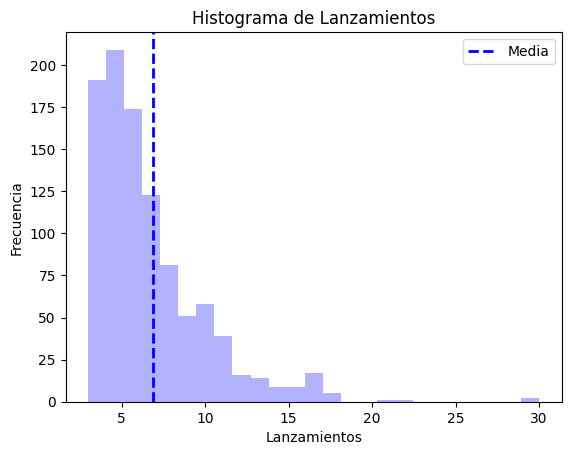

Promedio de lanzamientos:  6.89


In [116]:
# Número de experimentos
ne = 1000

# Realizar los experimentos
lanzamientos = exp(ne)

# Mostrar el resultado y generar el histograma
histograma(lanzamientos)

print('Promedio de lanzamientos: ', round(np.mean(lanzamientos), 2))
